# Modeling 1D

SimPEG has been slowly included into mtpy. The most basic inversion is 1D.  Here, a few different methods for inverting data in 1D are presented.  

In [1]:
from pathlib import Path
import numpy as np
from matplotlib import pyplot as plt

from mtpy import MTCollection

23:11:09T12:46:01 | WARNING | line:283 |mtpy.core.mt_collection | get_tf | Found multiple transfer functions with ID SAA300. Suggest setting survey, otherwise returning the TF from survey Musgraves_SA.


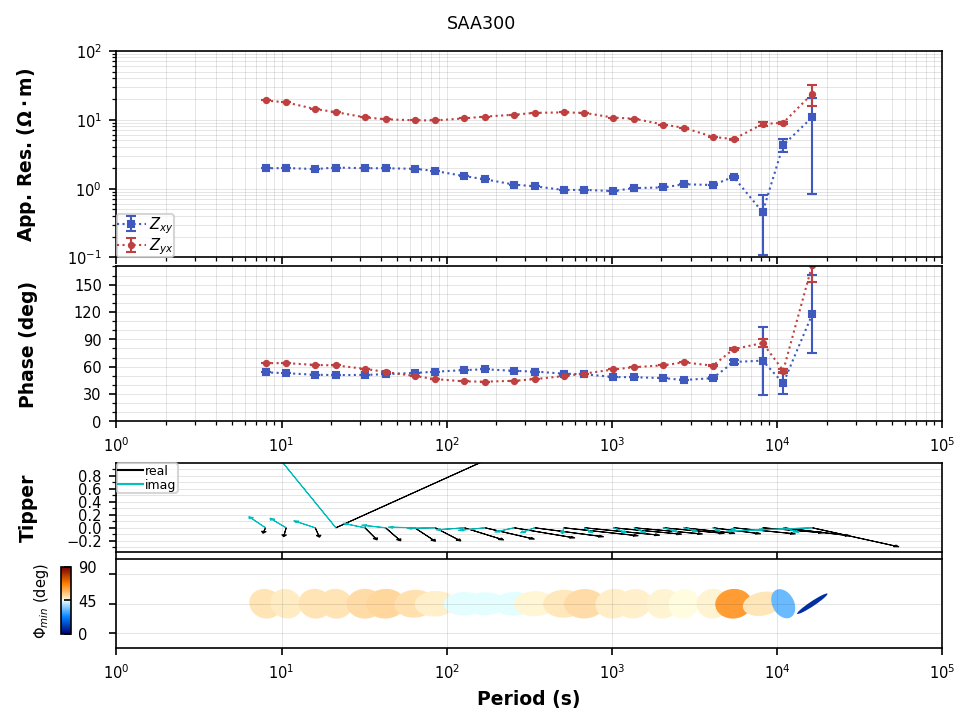

interactive(children=(Select(description='name', index=28, options=('SA225_2', 'SA26W2', 'SA274_2', 'SA295', '…

In [8]:
from mtpy import MTCollection
mc = MTCollection()
mc.open_collection(Path(r"../../data/transfer_functions/musgraves_tf.h5"))
#mc.open_collection(Path(r"../../../scratch/nm05/jp0633/musgraves_edis/musgraves_tf.h5"))

from ipywidgets import widgets, interact
station_names = mc.dataframe.station.values
def foo(name, component):
    tf = mc.get_tf(name)
    tf.plot_mt_response()
Q = interact(
    foo, 
    name=widgets.Select(options=station_names, value='SAA300'),
    component=widgets.RadioButtons(options=['xy', 'yx', 'det'], value='det')
)

23:11:09T12:39:37 | WARNING | line:283 |mtpy.core.mt_collection | get_tf | Found multiple transfer functions with ID SAA300. Suggest setting survey, otherwise returning the TF from survey Musgraves_SA.


Text(0.5, 1.0, 'SAA300')

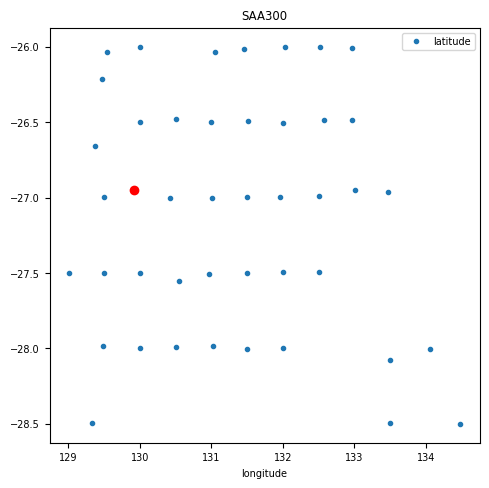

In [3]:
name = Q.widget.kwargs['name']
component = Q.widget.kwargs['component']
tf = mc.get_tf(name)

fig, ax = plt.subplots(1,1, figsize=(5,5))
mc.dataframe.plot(x='longitude', y='latitude', marker='.', linestyle='None', ax=ax)
ax.plot(tf.longitude, tf.latitude, 'ro')
ax.set_title(name)

C:\Users\jpeacock\OneDrive - DOI\Documents\GitHub\mtpy-v2\mtpy\core\transfer_function\z.py:576: RuntimeWarning: invalid value encountered in arcsin
  return np.rad2deg(np.arcsin(self.det_model_error / abs(self.det)))
C:\Users\jpeacock\OneDrive - DOI\Documents\GitHub\mtpy-v2\mtpy\core\transfer_function\z.py:576: RuntimeWarning: invalid value encountered in arcsin
  return np.rad2deg(np.arcsin(self.det_model_error / abs(self.det)))
C:\Users\jpeacock\OneDrive - DOI\Documents\GitHub\mtpy-v2\mtpy\core\transfer_function\z.py:576: RuntimeWarning: invalid value encountered in arcsin
  return np.rad2deg(np.arcsin(self.det_model_error / abs(self.det)))



                        SimPEG.InvProblem is setting bfgsH0 to the inverse of the eval2Deriv.
                        ***Done using same Solver, and solver_opts as the Simulation1DRecursive problem***
                        
model has any nan: 0
============================ Inexact Gauss Newton ============================
  #     beta     phi_d     phi_m       f      |proj(x-g)-x|  LS    Comment   
-----------------------------------------------------------------------------
x0 has any nan: 0
   0  2.79e+04  1.43e+05  0.00e+00  1.43e+05    6.91e+04      0              
   1  1.39e+04  1.62e+04  6.32e-06  1.62e+04    8.78e+03      0              
   2  6.97e+03  1.74e+03  2.11e-05  1.74e+03    1.18e+03      0   Skip BFGS  
   3  3.49e+03  1.60e+02  3.81e-05  1.60e+02    1.68e+02      0   Skip BFGS  
------------------------- STOP! -------------------------
1 : |fc-fOld| = 0.0000e+00 <= tolF*(1+|f0|) = 1.4350e+04
1 : |xc-x_last| = 2.7081e+00 <= tolX*(1+|x0|) = 3.3887e+00
0 : |proj(x-g

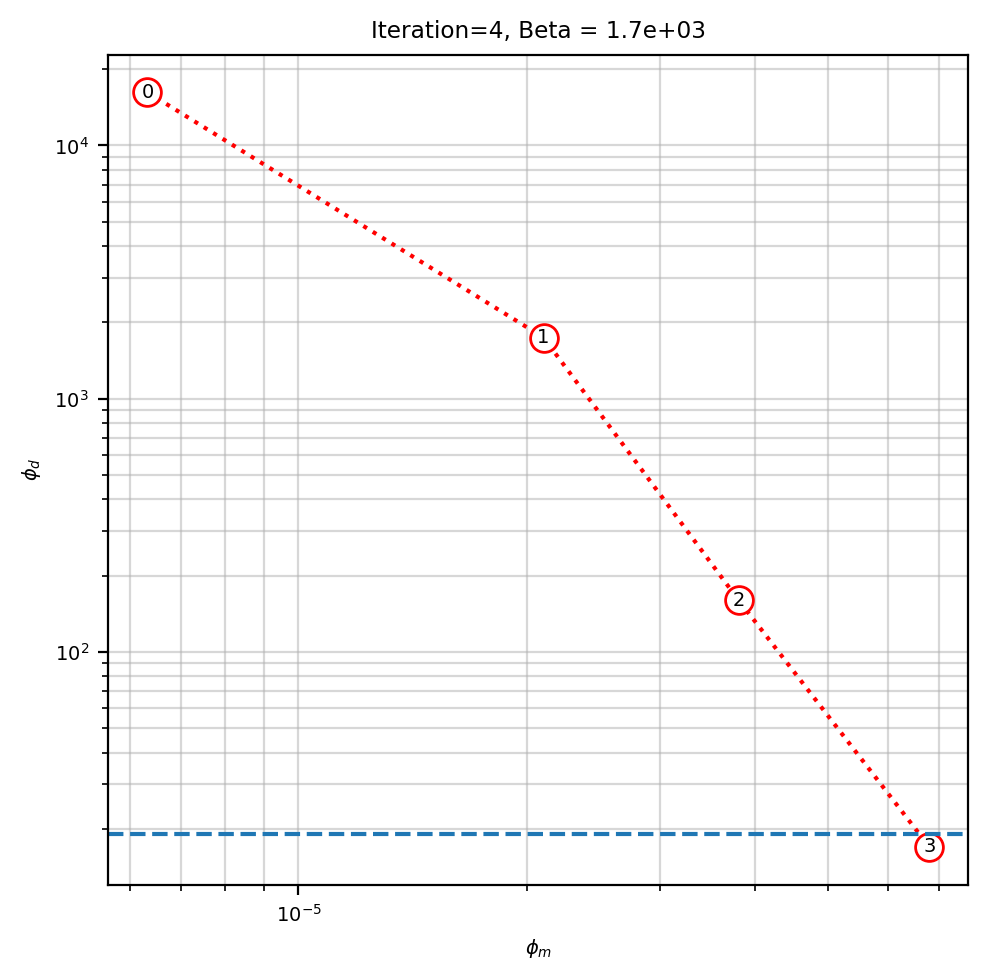

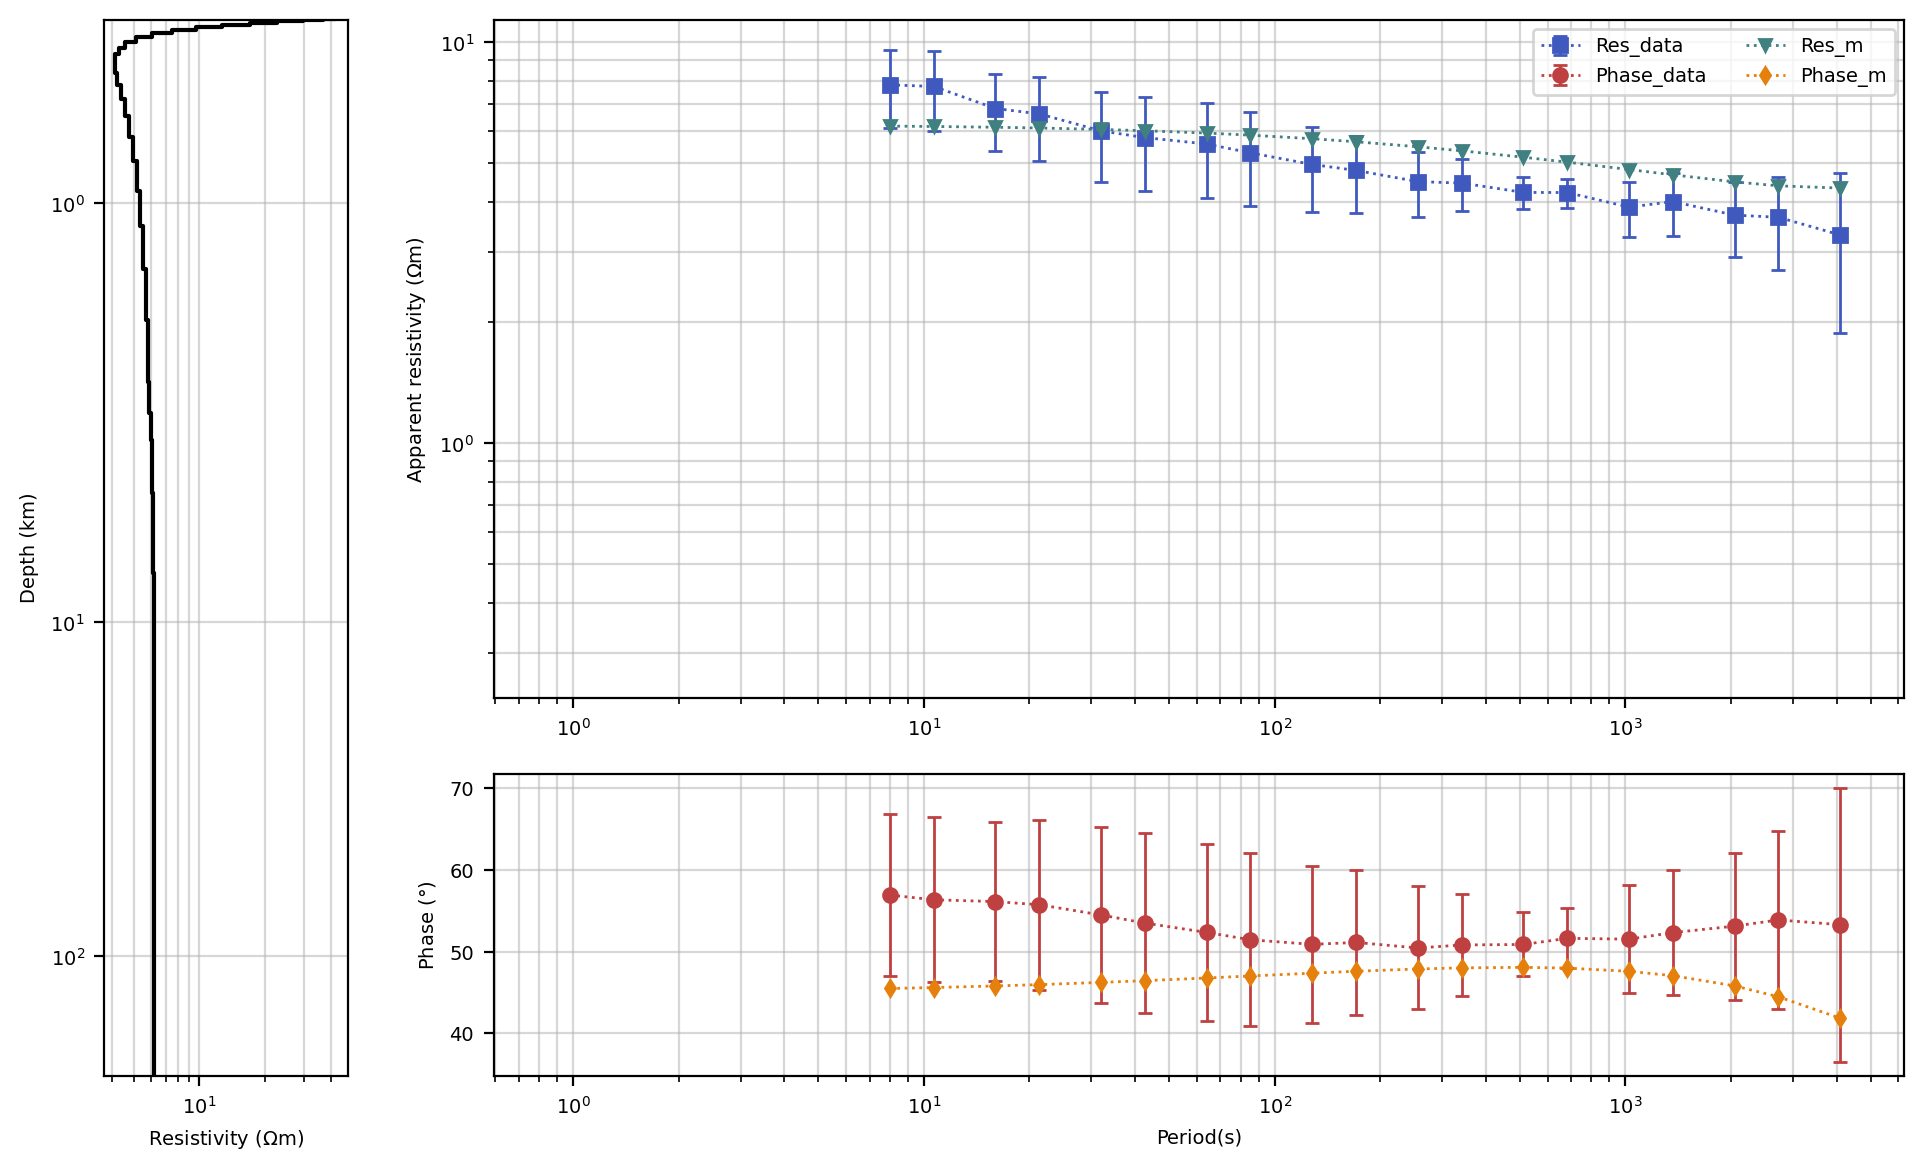

In [9]:
inv_obj = tf.to_simpeg_1d(mode="det")

C:\Users\jpeacock\OneDrive - DOI\Documents\GitHub\mtpy-v2\mtpy\core\transfer_function\z.py:576: RuntimeWarning: invalid value encountered in arcsin
  return np.rad2deg(np.arcsin(self.det_model_error / abs(self.det)))
C:\Users\jpeacock\OneDrive - DOI\Documents\GitHub\mtpy-v2\mtpy\core\transfer_function\z.py:576: RuntimeWarning: invalid value encountered in arcsin
  return np.rad2deg(np.arcsin(self.det_model_error / abs(self.det)))
C:\Users\jpeacock\OneDrive - DOI\Documents\GitHub\mtpy-v2\mtpy\core\transfer_function\z.py:576: RuntimeWarning: invalid value encountered in arcsin
  return np.rad2deg(np.arcsin(self.det_model_error / abs(self.det)))
C:\Users\jpeacock\Anaconda3\envs\py39\lib\site-packages\SimPEG\directives\directives.py:337: UserWarning: Without a Linear preconditioner, convergence may be slow. Consider adding `Directives.UpdatePreconditioner` to your directives list
  [directive.validate(self) for directive in self.dList]



                        SimPEG.InvProblem is setting bfgsH0 to the inverse of the eval2Deriv.
                        ***Done using same Solver, and solver_opts as the Simulation1DRecursive problem***
                        
model has any nan: 0
============================ Inexact Gauss Newton ============================
  #     beta     phi_d     phi_m       f      |proj(x-g)-x|  LS    Comment   
-----------------------------------------------------------------------------
x0 has any nan: 0
   0  1.22e+05  6.69e+05  0.00e+00  6.69e+05    3.14e+05      0              
   1  6.08e+04  7.74e+04  5.76e-06  7.74e+04    4.08e+04      0              
   2  3.04e+04  8.32e+03  1.96e-05  8.32e+03    5.52e+03      0   Skip BFGS  
   3  1.52e+04  7.42e+02  3.57e-05  7.43e+02    7.88e+02      0   Skip BFGS  
   4  7.60e+03  7.32e+01  6.40e-05  7.37e+01    1.36e+02      0   Skip BFGS  
Reached starting chifact with l2-norm regularization: Start IRLS steps...
irls_threshold 3.437204859038785
  

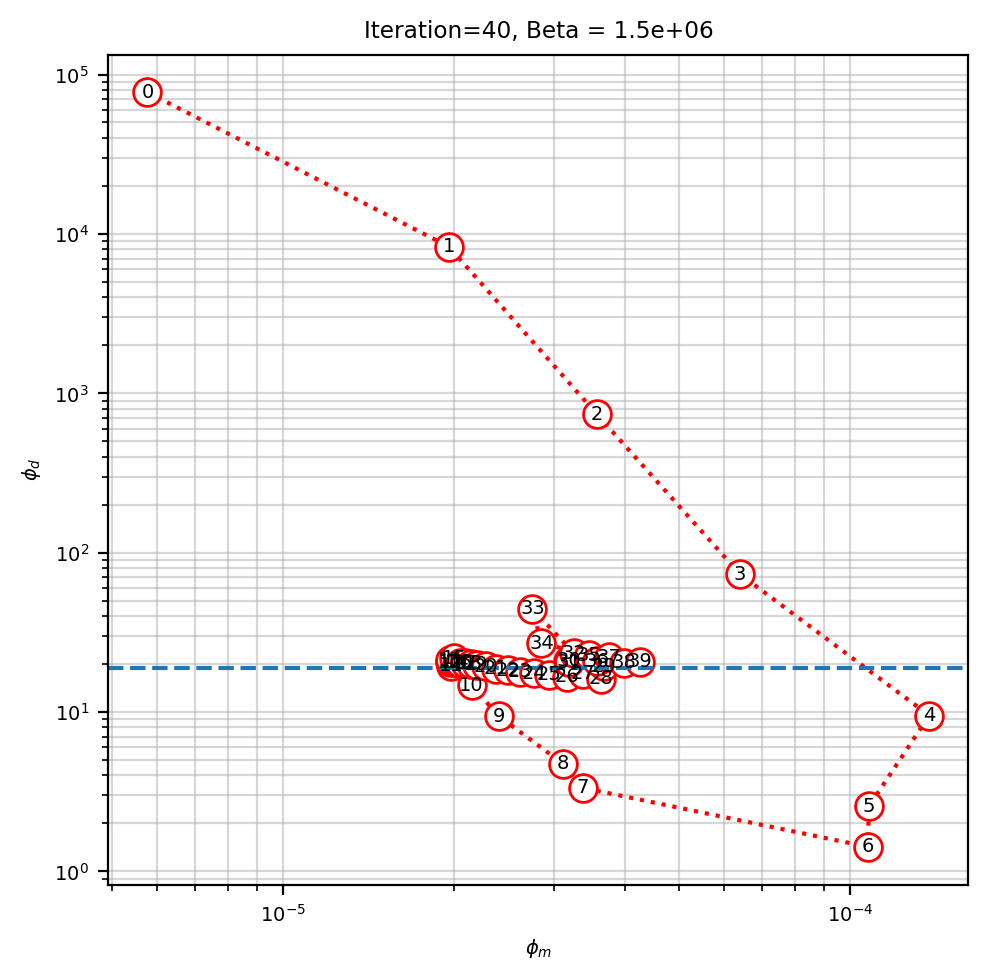

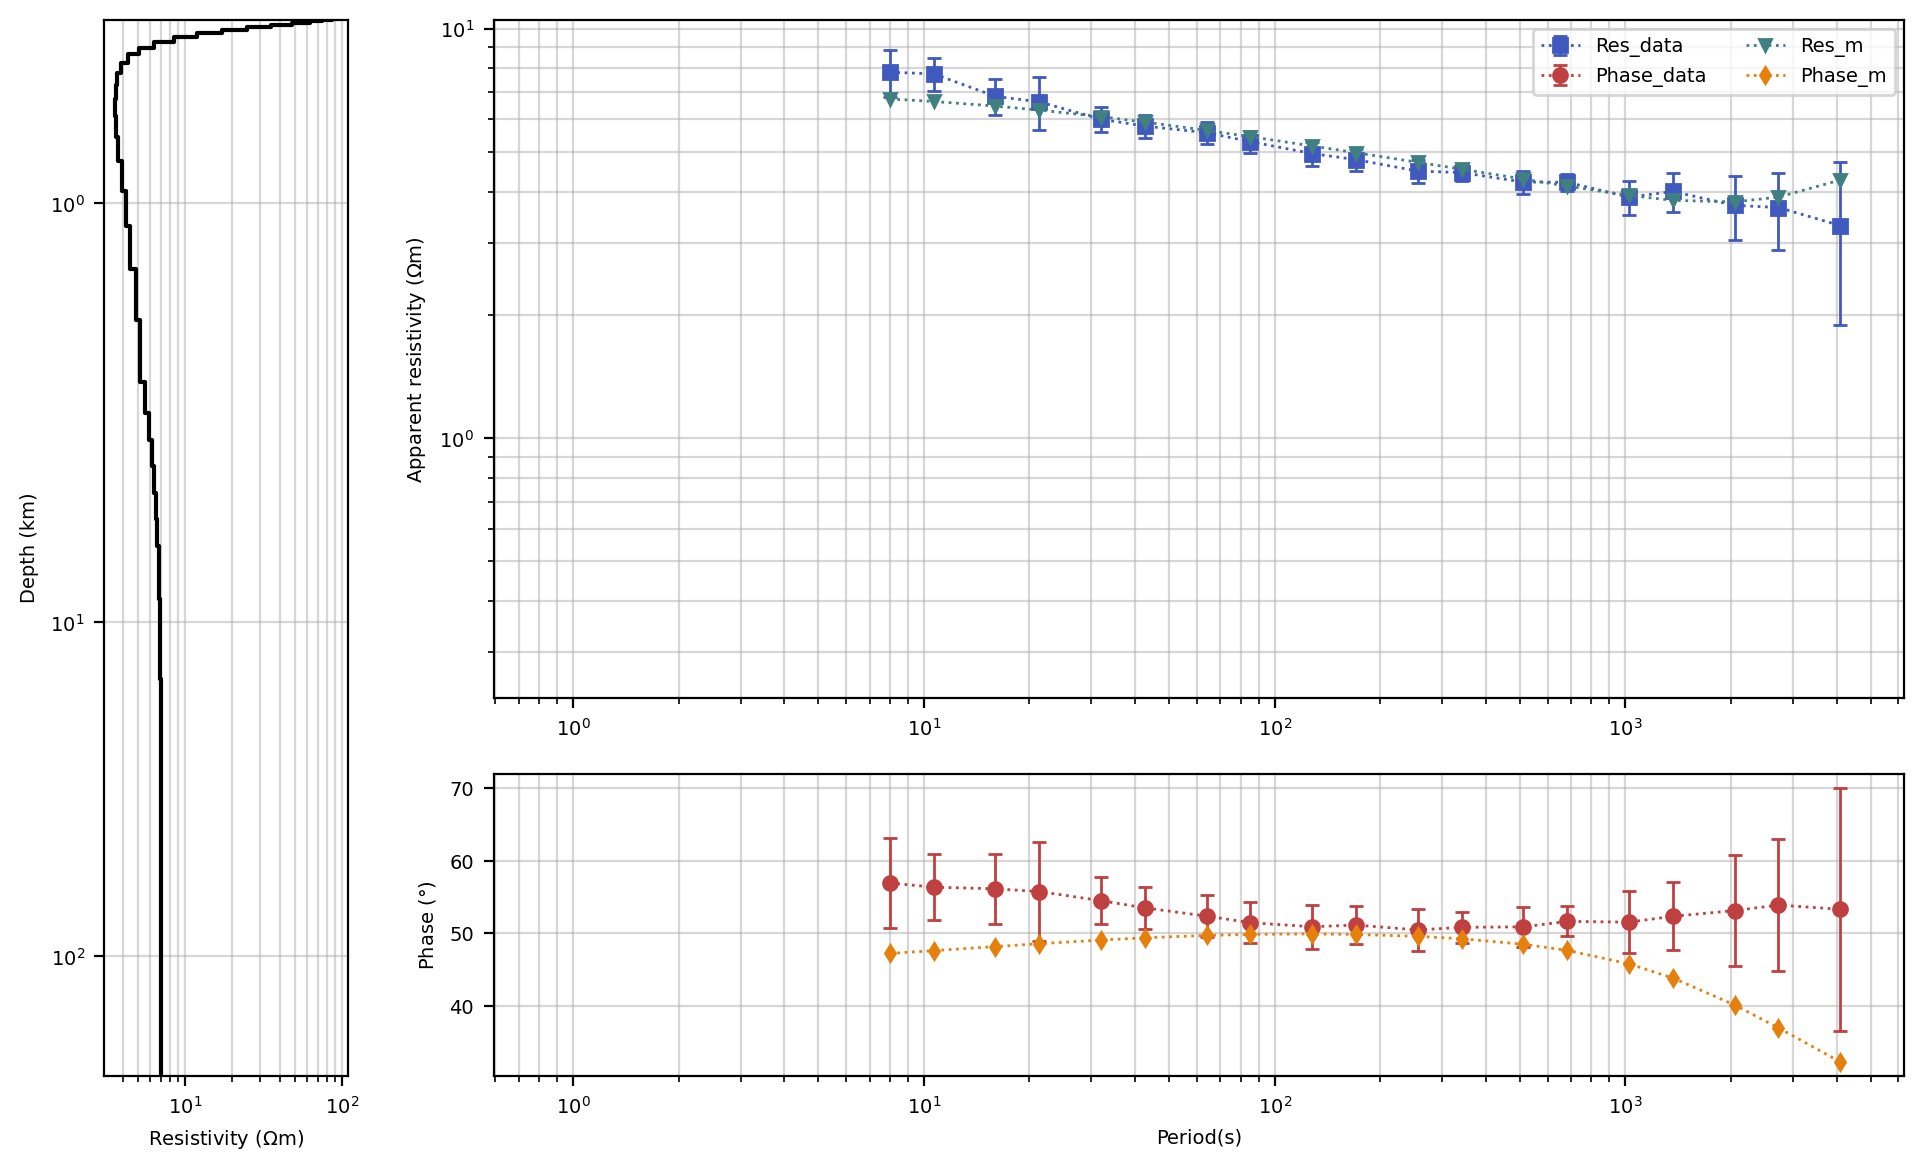

In [10]:
tf.compute_model_z_errors(error_value=3, error_type="data")
inv_obj = tf.to_simpeg_1d(mode="det", **{"p_s": 2, "p_z": 0, "use_irls": True})

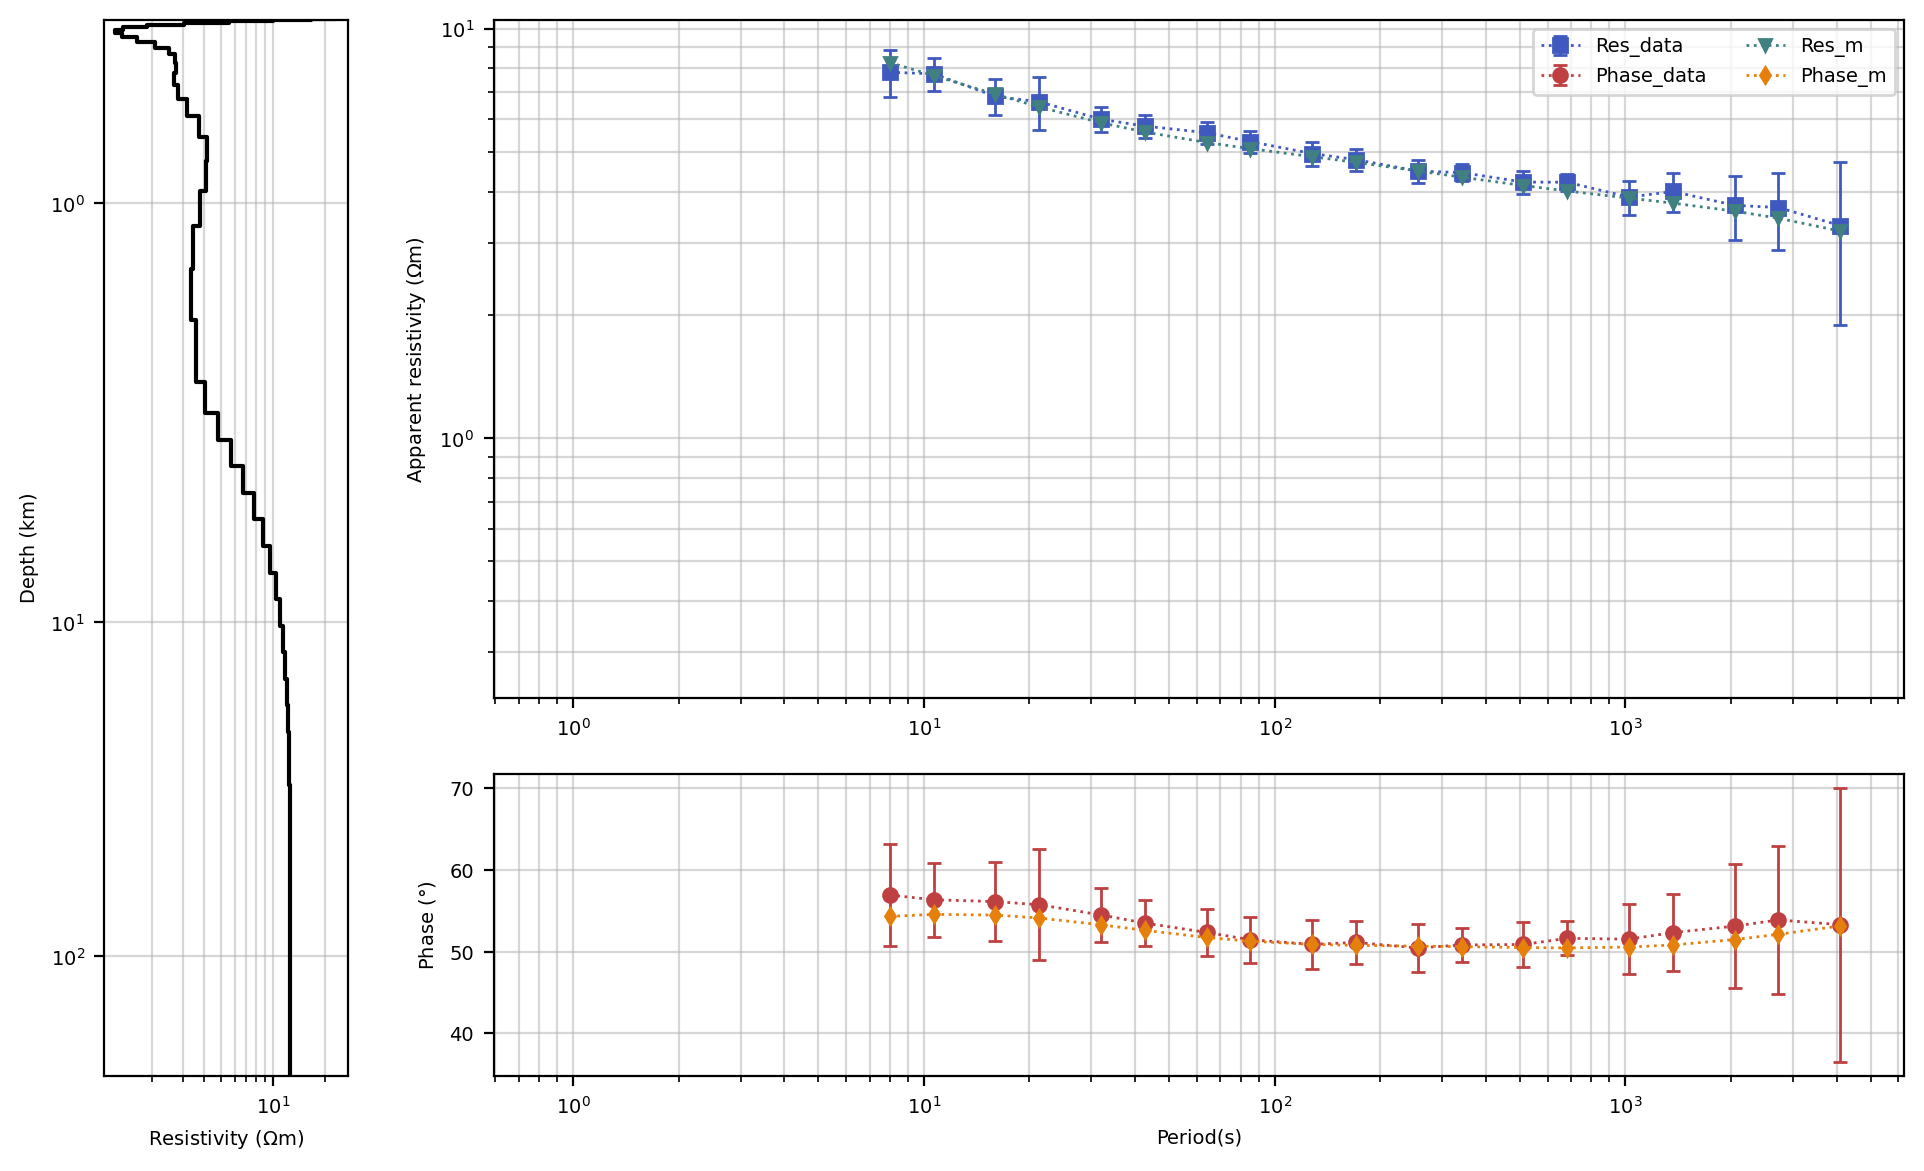

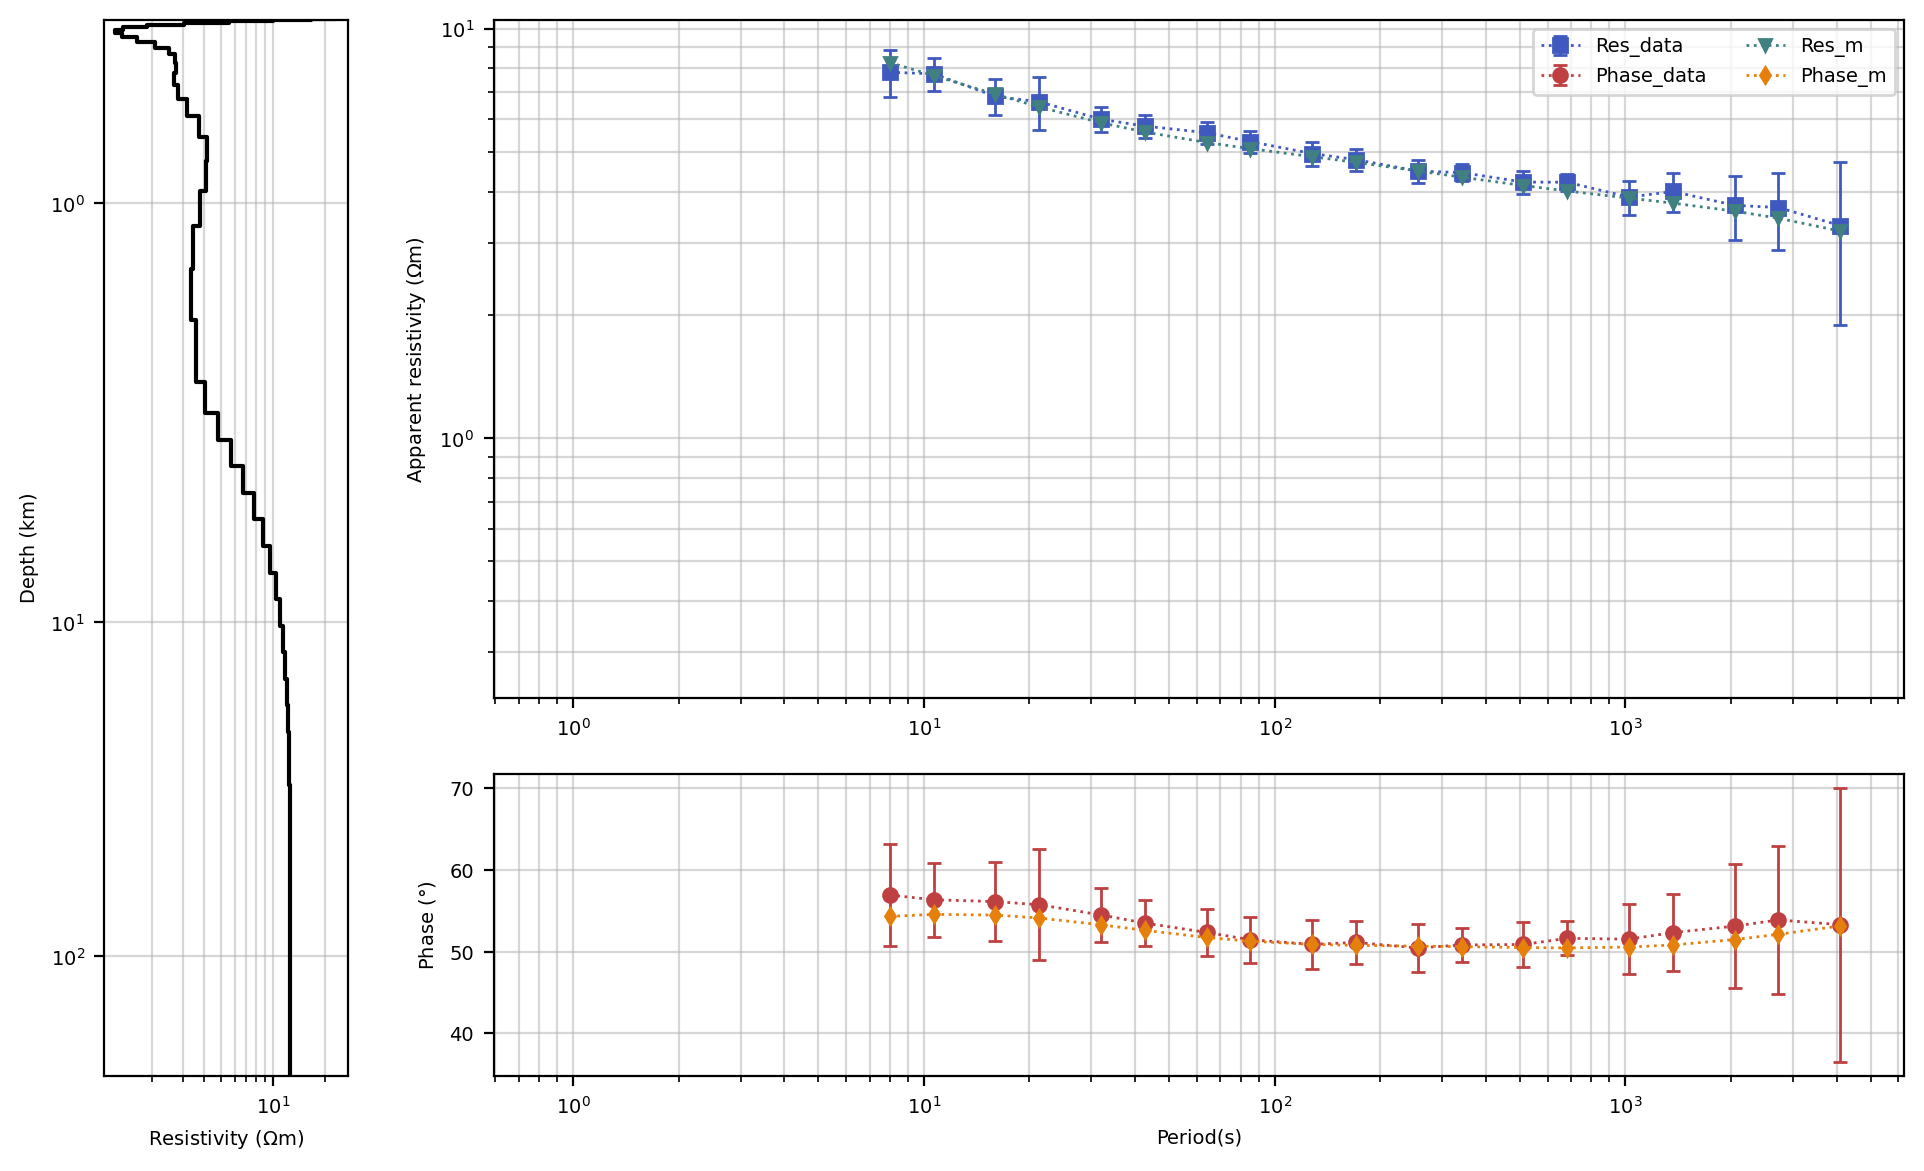

In [11]:
inv_obj.plot_response(6)

C:\Users\jpeacock\OneDrive - DOI\Documents\GitHub\mtpy-v2\mtpy\core\transfer_function\z.py:576: RuntimeWarning: invalid value encountered in arcsin
  return np.rad2deg(np.arcsin(self.det_model_error / abs(self.det)))
C:\Users\jpeacock\OneDrive - DOI\Documents\GitHub\mtpy-v2\mtpy\core\transfer_function\z.py:576: RuntimeWarning: invalid value encountered in arcsin
  return np.rad2deg(np.arcsin(self.det_model_error / abs(self.det)))
C:\Users\jpeacock\OneDrive - DOI\Documents\GitHub\mtpy-v2\mtpy\core\transfer_function\z.py:576: RuntimeWarning: invalid value encountered in arcsin
  return np.rad2deg(np.arcsin(self.det_model_error / abs(self.det)))
C:\Users\jpeacock\Anaconda3\envs\py39\lib\site-packages\SimPEG\directives\directives.py:337: UserWarning: Without a Linear preconditioner, convergence may be slow. Consider adding `Directives.UpdatePreconditioner` to your directives list
  [directive.validate(self) for directive in self.dList]



                        SimPEG.InvProblem is setting bfgsH0 to the inverse of the eval2Deriv.
                        ***Done using same Solver, and solver_opts as the Simulation1DRecursive problem***
                        
model has any nan: 0
============================ Inexact Gauss Newton ============================
  #     beta     phi_d     phi_m       f      |proj(x-g)-x|  LS    Comment   
-----------------------------------------------------------------------------
x0 has any nan: 0
   0  1.74e+05  6.69e+05  0.00e+00  6.69e+05    3.14e+05      0              
   1  8.70e+04  7.74e+04  5.76e-06  7.74e+04    4.08e+04      0              
   2  4.35e+04  8.32e+03  1.96e-05  8.32e+03    5.52e+03      0   Skip BFGS  
   3  2.18e+04  7.42e+02  3.57e-05  7.43e+02    7.88e+02      0   Skip BFGS  
   4  1.09e+04  7.32e+01  6.39e-05  7.39e+01    1.36e+02      0   Skip BFGS  
Reached starting chifact with l2-norm regularization: Start IRLS steps...
irls_threshold 3.4356328659945388
 

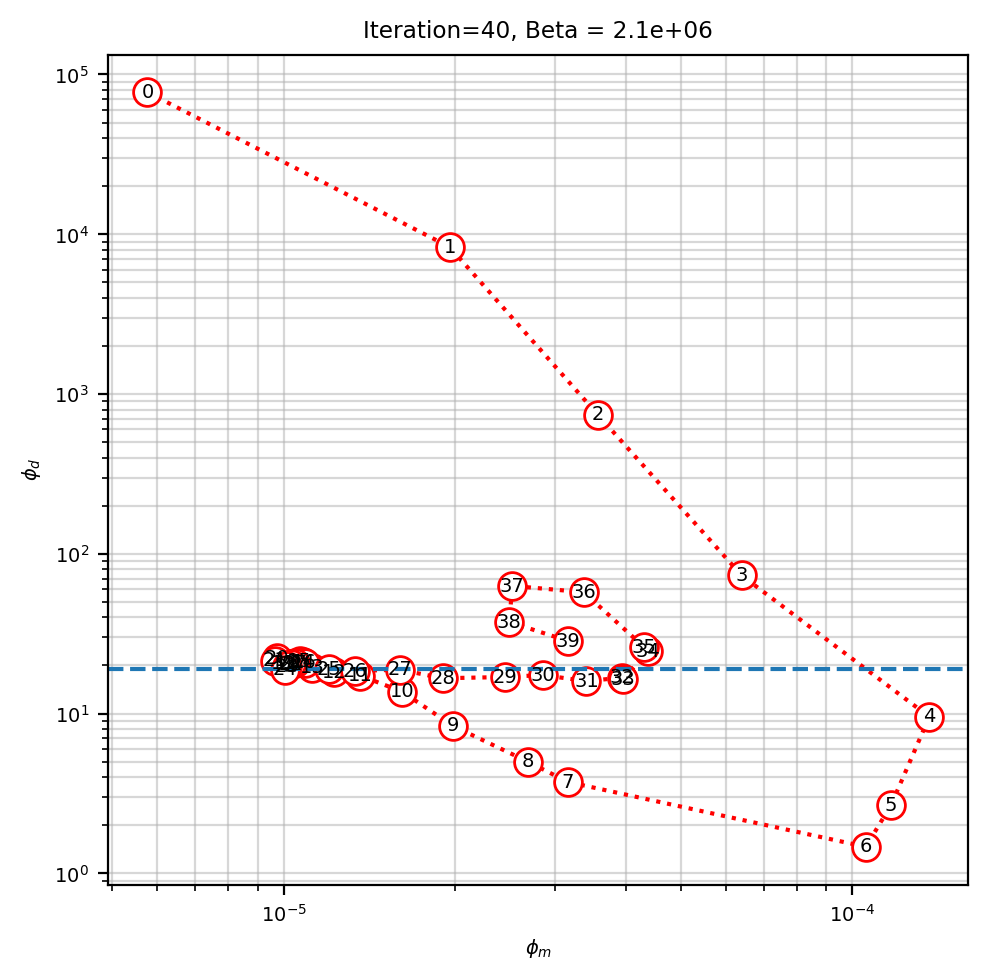

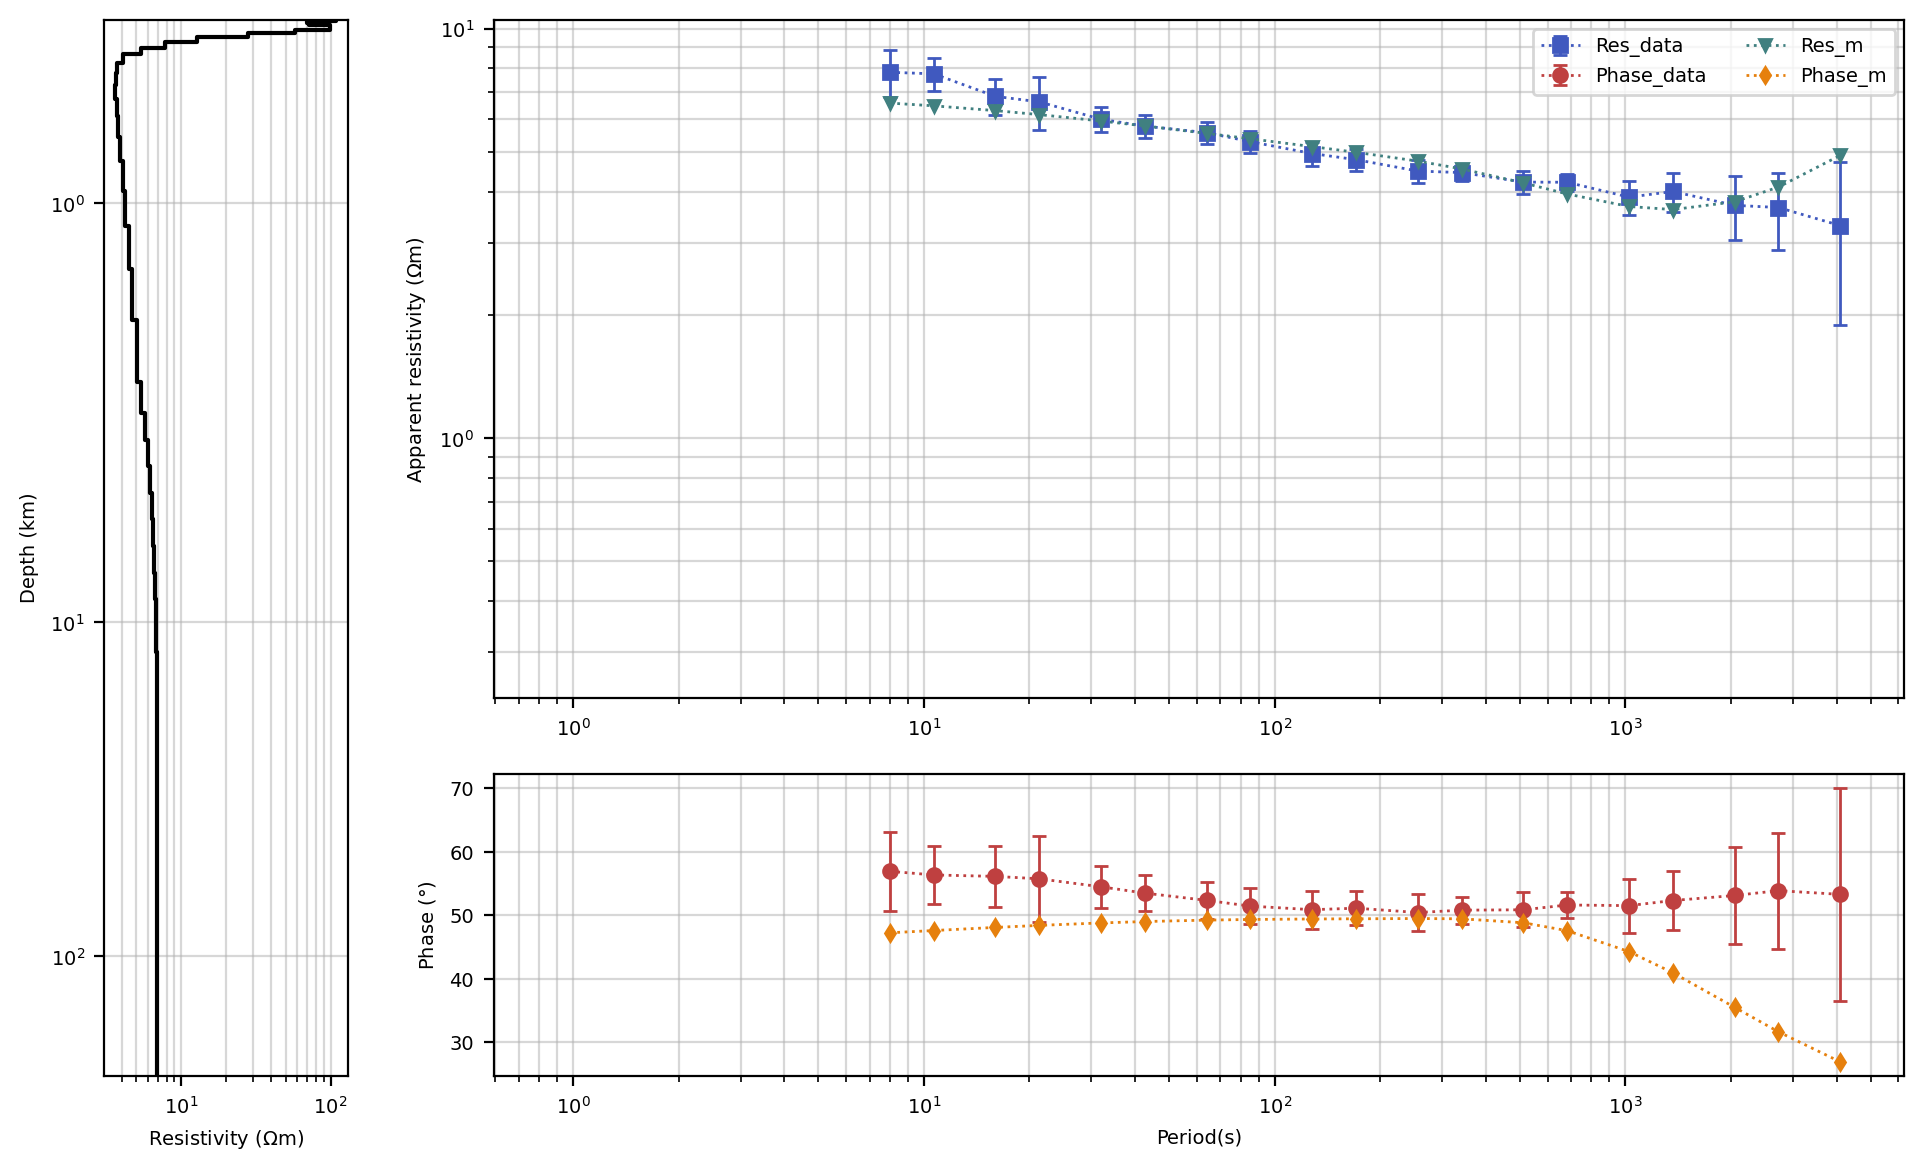

In [12]:
inv_obj = tf.to_simpeg_1d(mode="det", **{"p_s": 0, "p_z": 0, "use_irls": True})

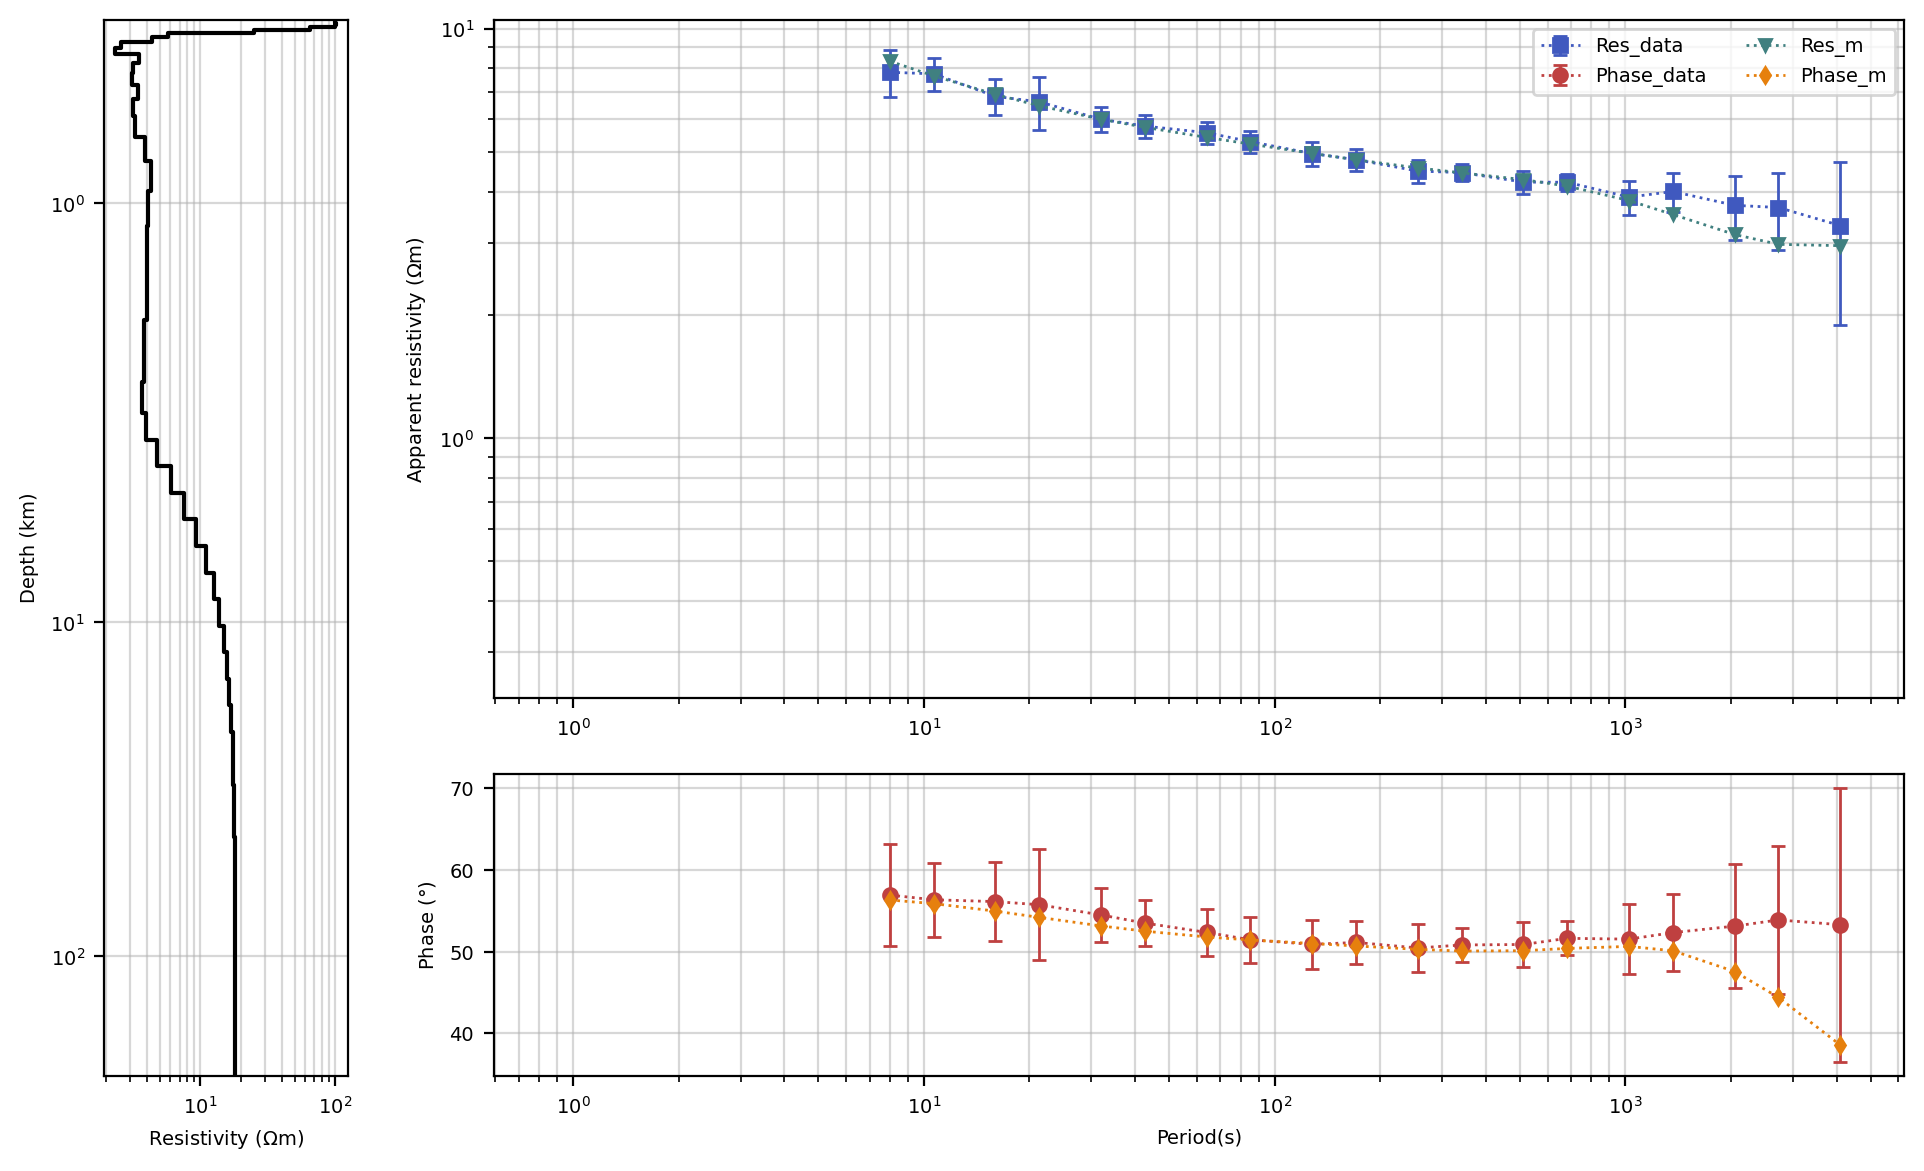

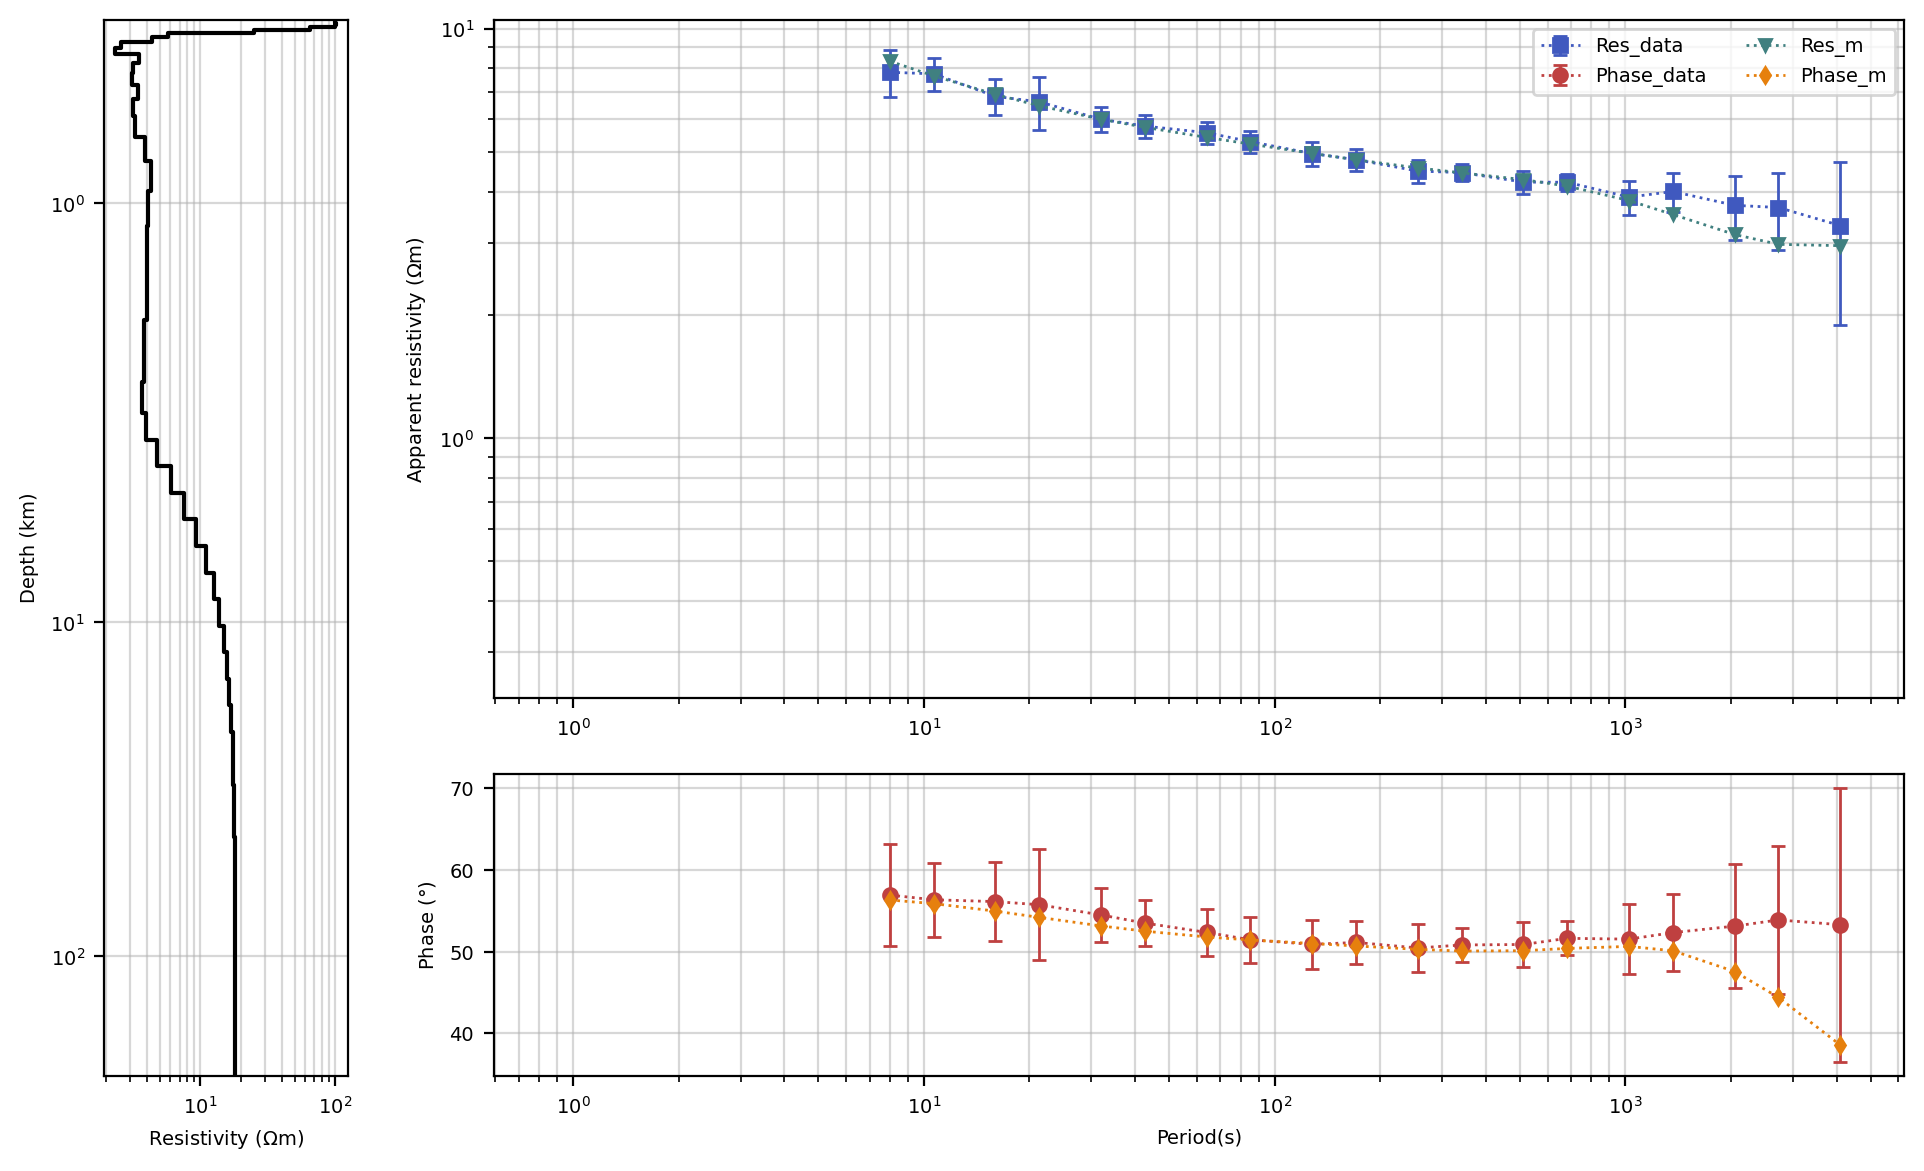

In [17]:
inv_obj.plot_response(8)

In [13]:
mc.close_collection()

23:11:09T11:04:01 | ERROR | line:230 |mth5.tables.mth5_table | add_row | Data types are not equal. Input dtypes: [('survey', 'S30'), ('station', 'S30'), ('run', 'S20'), ('latitude', '<f8'), ('longitude', '<f8'), ('elevation', '<f8'), ('component', 'S20'), ('start', 'S36'), ('end', 'S36'), ('n_samples', '<i4'), ('sample_rate', '<f8'), ('measurement_type', 'S30'), ('azimuth', '<f8'), ('tilt', '<f8'), ('units', 'S60'), ('hdf5_reference', 'O'), ('run_hdf5_reference', 'O'), ('station_hdf5_reference', 'O')] Table dtypes: [('survey', 'S30'), ('station', 'S30'), ('run', 'S20'), ('latitude', '<f8'), ('longitude', '<f8'), ('elevation', '<f8'), ('component', 'S20'), ('start', 'S36'), ('end', 'S36'), ('n_samples', '<i8'), ('sample_rate', '<f8'), ('measurement_type', 'S30'), ('azimuth', '<f8'), ('tilt', '<f8'), ('units', 'S60'), ('hdf5_reference', 'O'), ('run_hdf5_reference', 'O'), ('station_hdf5_reference', 'O')]
23:11:09T11:04:01 | INFO | line:116 |mth5.helpers | close_open_files | ..\..\data\tra